# Première analyse du jeu de données

## Importaiton des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from connexion import *

## Création du MCD à l'aide de MOCODO

In [2]:
%reload_ext mocodo_magic

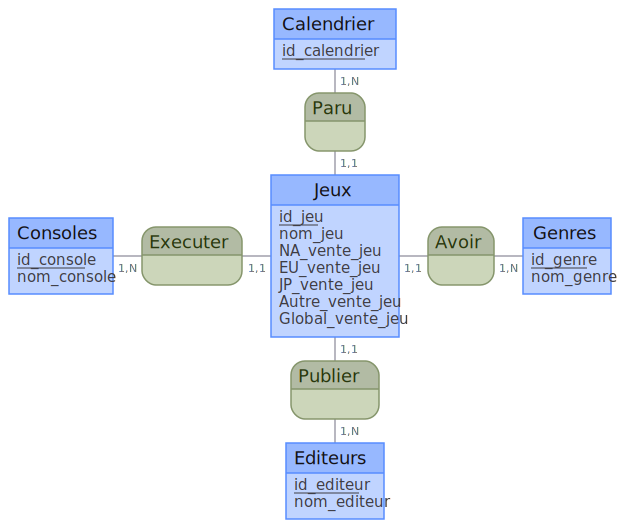

In [3]:
%%mocodo --mld --colors ocean --shapes copperplate --title=vente_jeux --relations=mysql
:
:
Calendrier: id_calendrier [DATE NOT NULL]
:
:

::
Paru, 1N Calendrier, 11 Jeux
::

Consoles : id_console [INT NOT NULL], nom_console [VARCHAR(100) NOT NULL]
Executer, 1N Consoles, 11 Jeux
Jeux : id_jeu [INT NOT NULL], nom_jeu [VARCHAR(200) NOT NULL], NA_vente_jeu [FLOAT], EU_vente_jeu [FLOAT], JP_vente_jeu [FLOAT], Autre_vente_jeu [FLOAT], Global_vente_jeu [FLOAT]
Avoir, 11 Jeux, 1N Genres
Genres: id_genre [INT NOT NULL], nom_genre [VARCHAR(100)]

::
Publier, 11 Jeux, 1N Editeurs
::

::
Editeurs : id_editeur [INT], nom_editeur [VARCHAR(100)]
::

## Visulalisation du fichier sql généré par mocodo

In [4]:
# %load mocodo_notebook/sandbox_mysql.sql
CREATE DATABASE IF NOT EXISTS `VENTE_JEUX` DEFAULT CHARACTER SET utf8 COLLATE utf8_general_ci;
USE `VENTE_JEUX`;

/*
CREATE TABLE `CALENDRIER` (
  `id_calendrier` DATE NOT NULL,
  PRIMARY KEY (`id_calendrier`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;
*/

CREATE TABLE `CONSOLES` (
  `id_console` INT NOT NULL,
  `nom_console` VARCHAR(100) NOT NULL,
  PRIMARY KEY (`id_console`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `JEUX` (
  `id_jeu` INT NOT NULL,
  `nom_jeu` VARCHAR(200) NOT NULL,
  `na_vente_jeu` FLOAT,
  `eu_vente_jeu` FLOAT,
  `jp_vente_jeu` FLOAT,
  `autre_vente_jeu` FLOAT,
  `global_vente_jeu` FLOAT,
  `id_calendrier` DATE NOT NULL,
  `id_console` INT NOT NULL,
  `id_genre` INT NOT NULL,
  `id_editeur` INT,
  PRIMARY KEY (`id_jeu`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `GENRES` (
  `id_genre` INT NOT NULL,
  `nom_genre` VARCHAR(100),
  PRIMARY KEY (`id_genre`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

CREATE TABLE `EDITEURS` (
  `id_editeur` INT,
  `nom_editeur` VARCHAR(100),
  PRIMARY KEY (`id_editeur`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8;

ALTER TABLE `JEUX` ADD FOREIGN KEY (`id_editeur`) REFERENCES `EDITEURS` (`id_editeur`);
ALTER TABLE `JEUX` ADD FOREIGN KEY (`id_genre`) REFERENCES `GENRES` (`id_genre`);
ALTER TABLE `JEUX` ADD FOREIGN KEY (`id_console`) REFERENCES `CONSOLES` (`id_console`);
-- ALTER TABLE `JEUX` ADD FOREIGN KEY (`id_calendrier`) REFERENCES `CALENDRIER` (`id_calendrier`);

Mocodo a permis de générer le code SQL pour la création de la base proposé et l'a stocké dans un fichier au format "*.sql*". Cependant on remarque que certaines commande sont commentées. Il a donc été nécéssaire de retravailler le fichier manuellement pour permettre la création de la table __*calendrier*__ qui ne possède uniquement une colonne id. Les commandes de création de clefs étrangères ont quant-à elles commenter pour éviter tout problème lors du chargment des données. 

## Création de la base de donnée

In [5]:
nom_bdd = "vente_jeux" # nom de la base de donnée
fichier_creation = "./mocodo_notebook/sandbox_mysql.sql" # fichier sql avec chemin relatif

In [6]:
Connexion.ouvrir()
Connexion.drop_db(nom_bdd)
Connexion.fermer()

In [7]:
Connexion.creation(nom_bdd, fichier_creation) # Connexion à MySQL

Running query:  CMySQLCursor: CREATE DATABASE IF NOT EXISTS `VENTE_JEU..
Affected 1 rows
Running query:  CMySQLCursor: USE `VENTE_JEUX`
Affected 0 rows
Running query:  CMySQLCursor: CREATE TABLE `CALENDRIER` (
  `id_calend..
Affected 0 rows
Running query:  CMySQLCursor: CREATE TABLE `CONSOLES` (
  `id_console`..
Affected 0 rows
Running query:  CMySQLCursor: CREATE TABLE `JEUX` (
  `id_jeu` INT NOT..
Affected 0 rows
Running query:  CMySQLCursor: CREATE TABLE `GENRES` (
  `id_genre` INT..
Affected 0 rows
Running query:  CMySQLCursor: CREATE TABLE `EDITEURS` (
  `id_editeur`..
Affected 0 rows
Running query:  CMySQLCursor: -- ALTER TABLE `JEUX` ADD FOREIGN KEY (`..
Affected 0 rows


## Chargement des données

In [2]:
data = pd.read_csv("./vgsales.csv") # Chargement du fichier CSV
data.head() # affichages des 5 premières observation des datas

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
data.info() # information générale du DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
data.dropna(inplace=True) # Suppression des lignes contenant des valeurs manquantes
data.reset_index(drop=True, inplace=True) # Re-initialisation des index du DataSet suite à la suppression de lignes

In [11]:
data["Year"] = data["Year"].astype("int") #pd.Int32Dtype()) # conversion dtype colonne float64 en int32 (Int32Dtype prend en charge les NaN)

In [12]:
jeux = data.copy() # copy du DataSet qui servira à la génération de la table "__*jeux*__"

## Extraction des années et formatage (AAAA-MM-DD)

In [13]:
year = np.sort(data["Year"].unique()) # Récupération des valeurs uniques avec trie des valeurs
print(year)

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2020]


### Création du fichier csv pour la bdd

In [14]:
calendrier = pd.DataFrame(year.copy().astype("str"), columns=["year"]) # Création du DataFrame "calendar" pour le formatage de la date

In [15]:
calendrier["month"] = "01" # Ajout du mois de manière arbitraire
calendrier["day"] = "01" # Ajout du jour de manière arbitraire

In [16]:
calendrier.info() # affichage des infos du DataFrame calendar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    39 non-null     object
 1   month   39 non-null     object
 2   day     39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [17]:
calendrier = pd.to_datetime(calendrier).astype("str").rename("id_calendrier") # Formatage du calendrier au format (AAAA-MM-DD)

In [18]:
calendrier.to_csv("./CSV_2DB/annees.csv", index=False, header=True) # Export du fichier csv, qui sera utilisé pour l'import en base de données

In [19]:
year_kv = dict((k, v) for v, k in zip(calendrier, year)) # Création d'un dictionnaire permettant de remplacer les dates initiale (key) par le nouveau format (value)
print(year_kv)

{1980: '1980-01-01', 1981: '1981-01-01', 1982: '1982-01-01', 1983: '1983-01-01', 1984: '1984-01-01', 1985: '1985-01-01', 1986: '1986-01-01', 1987: '1987-01-01', 1988: '1988-01-01', 1989: '1989-01-01', 1990: '1990-01-01', 1991: '1991-01-01', 1992: '1992-01-01', 1993: '1993-01-01', 1994: '1994-01-01', 1995: '1995-01-01', 1996: '1996-01-01', 1997: '1997-01-01', 1998: '1998-01-01', 1999: '1999-01-01', 2000: '2000-01-01', 2001: '2001-01-01', 2002: '2002-01-01', 2003: '2003-01-01', 2004: '2004-01-01', 2005: '2005-01-01', 2006: '2006-01-01', 2007: '2007-01-01', 2008: '2008-01-01', 2009: '2009-01-01', 2010: '2010-01-01', 2011: '2011-01-01', 2012: '2012-01-01', 2013: '2013-01-01', 2014: '2014-01-01', 2015: '2015-01-01', 2016: '2016-01-01', 2017: '2017-01-01', 2020: '2020-01-01'}


In [20]:
jeux["Year"] = jeux["Year"].replace(year_kv) # Remplacement des dates par les dates formater, pour pouvoir faire le lien avec la table calendrier
jeux # vérification du changement

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [21]:
Connexion.ouvrir() # ouvrir la bdd
Connexion.import_csv('./CSV_2DB/annees.csv', "calendrier") # import des valeurs du csv dans la bdd
Connexion.fermer() # fermer la bdd

## Extraction "Plateform" vers un CSV

In [22]:
console = data["Platform"].unique() # Extraction des valeurs console unique
console = np.sort(console) # Trie des valeurs
console

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [23]:
console_kv = dict((k, v) for v, k in enumerate(console, 1)) # mise des données sous forme de dictionnaire
print(console_kv)

{'2600': 1, '3DO': 2, '3DS': 3, 'DC': 4, 'DS': 5, 'GB': 6, 'GBA': 7, 'GC': 8, 'GEN': 9, 'GG': 10, 'N64': 11, 'NES': 12, 'NG': 13, 'PC': 14, 'PCFX': 15, 'PS': 16, 'PS2': 17, 'PS3': 18, 'PS4': 19, 'PSP': 20, 'PSV': 21, 'SAT': 22, 'SCD': 23, 'SNES': 24, 'TG16': 25, 'WS': 26, 'Wii': 27, 'WiiU': 28, 'X360': 29, 'XB': 30, 'XOne': 31}


In [24]:
jeux["Platform"] = jeux["Platform"].replace(console_kv) # remplacement des données platform par leu indices dans le dataframe jeux

In [25]:
console = pd.Series(console, name="nom_console") # conversion de array en Serie
console.index += 1 # incrementation de l'index pour commencer à 1
console.to_csv("./CSV_2DB/consoles.csv", index=True, header=True) # Export de la table en csv

In [26]:
Connexion.ouvrir() # ouvrir la bdd
Connexion.import_csv('./CSV_2DB/consoles.csv', "consoles") # import des valeurs du csv dans la bdd
Connexion.fermer() # fermer la bdd

## Extraction "Genre" vers un CSV

In [27]:
genre = data["Genre"].unique() # Extraction des valeurs console unique
genre = np.sort(genre) # Trie des valeurs
genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [28]:
genre_kv = dict((k, v) for v, k in enumerate(genre, 1)) # mise des données sous forme de dictionnaire
print(genre_kv) # affichage des clefs valeurs

{'Action': 1, 'Adventure': 2, 'Fighting': 3, 'Misc': 4, 'Platform': 5, 'Puzzle': 6, 'Racing': 7, 'Role-Playing': 8, 'Shooter': 9, 'Simulation': 10, 'Sports': 11, 'Strategy': 12}


In [29]:
jeux["Genre"] = jeux["Genre"].replace(genre_kv) # remplacement des données genres par leu indices dans le dataframe jeux

In [30]:
genre = pd.Series(genre, name="nom_genre") # conversion de array en Serie
genre.index += 1 # incrementation de l'index pour commencer à 1
genre.to_csv("./CSV_2DB/genres.csv", index=True, header=True) # Export de la table en csv

In [31]:
Connexion.ouvrir() # ouvrir la bdd
Connexion.import_csv('./CSV_2DB/genres.csv', "genres") # import des valeurs du csv dans la bdd
Connexion.fermer() # fermer la bdd

## Extraction "Publisher" vers un CSV

In [4]:
editeur = data["Publisher"].unique() # Extraction des valeurs console unique
editeur = [x for x in editeur if str(x) != 'nan'] 
editeur = np.sort(editeur) # Trie des valeurs

In [7]:
editeur = pd.Series(editeur, name="nom_editeur") # conversion de array en Serie
editeur.index += 1 # incrementation de l'index pour commencer à 1
editeur = editeur.apply(lambda x: x.replace(',','-'))
editeur.to_csv("./CSV_2DB/editeurs.csv", index=True, header=True) # Export de la table en csv

In [8]:
Connexion.ouvrir() # ouverture de la bdd
Connexion.import_csv('./CSV_2DB/editeurs.csv', "editeurs") # importation des valeurs du csv dans la bdd
Connexion.fermer() # fermeture de la bdd

In [35]:
editeur_kv = dict((k, v) for v, k in enumerate(editeur, 1)) # mise des données sous forme de dictionnaire

In [37]:
jeux["Publisher"] = jeux["Publisher"].replace(editeur_kv).astype("str") # Remplacement des editeurs par leurs indice dans la matrice jeux

# Préparation du CSV jeux pour la table jeux

In [38]:
jeux = jeux.drop(columns=["Rank"]) # Suppression de la colonne Rank

In [39]:
jeux = jeux[["Name", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales", "Year", "Platform", "Genre", "Publisher"]] # Réorganisation des colonnes
# Changement des noms des colonnes
jeux = jeux.rename(columns={"Name" : "nom_jeu", "NA_Sales" : "na_vente_jeu", "EU_Sales" : "eu_vente_jeu", "JP_Sales" : "jp_vente_jeu", "Other_Sales" : "autre_vente_jeu", "Global_Sales" : "global_vente_jeu", "Year" : "id_calendrier", "Platform" : "id_console", "Genre" : "id_genre", "Publisher" : "id_editeur"})

In [40]:
jeux.index += 1 # Incrémentation de l'index pour commencer à 1
jeux.to_csv("./CSV_2DB/jeux.csv", index=True, header=True) # Export en CSV en gardant l'entête

In [41]:
Connexion.ouvrir() # Ouverture de la bdd
Connexion.import_csv('./CSV_2DB/jeux.csv', "jeux") # importation des valeurs du fichier csv directement dans la base de données
Connexion.fermer() # fermeture de la bdd

# Création des clefs étrangères

In [45]:
Connexion.ouvrir()

In [46]:
query = "ALTER TABLE `JEUX` ADD FOREIGN KEY (`id_genre`) REFERENCES `GENRES` (`id_genre`);"
Connexion.execute(query)

[]

In [47]:
query = "ALTER TABLE `JEUX` ADD FOREIGN KEY (`id_console`) REFERENCES `CONSOLES` (`id_console`);"
Connexion.execute(query)

[]

In [48]:
query = "ALTER TABLE `JEUX` ADD FOREIGN KEY (`id_calendrier`) REFERENCES `CALENDRIER` (`id_calendrier`);"
Connexion.execute(query)

[]

In [9]:
query = "ALTER TABLE `JEUX` ADD FOREIGN KEY (`id_editeur`) REFERENCES `EDITEURS` (`id_editeur`);"
Connexion.execute(query)

AttributeError: 'NoneType' object has no attribute 'execute'

In [50]:
Connexion.fermer()